In [1]:
from docx_writer import DocxWriter
import pandas as pd
from PIL import Image
import os

# Import demo data

In [2]:
demo_data = pd.read_excel("Demo_data.xlsx")
demo_data["Date"] = demo_data["Date"].astype("str")
demo_data

,Recipient Name,Address Line 1,City,Country,Company Name,City.1,Phone Number,Email,Date
0,John Doe,123 Elm St,Springfield,USA,Acme Corporation,Springfield,(555) 123-4567,john.doe@example.com,2025-01-06
1,Jane Smith,789 Maple Ave,Metropolis,USA,Beta Industries,Metropolis,(555) 987-6543,jane.smith@example.com,2025-01-06
2,Michael Johnson,456 Birch Rd,Gotham,USA,Gamma Solutions,Gotham,(555) 234-5678,michael.j@example.com,2025-01-06
3,Emily Davis,321 Walnut St,Star City,USA,Delta Enterprises,Star City,(555) 876-5432,emily.davis@example.com,2025-01-06
4,Chris Lee,654 Chestnut St,Hill Valley,USA,Epsilon Tech,Hill Valley,(555) 345-6789,chris.lee@example.com,2025-01-06
5,Sarah Wilson,852 Poplar St,Smalltown,USA,Zeta Innovations,Smalltown,(555) 456-7890,sarah.wilson@example.com,2025-01-06
6,David Brown,963 Willow Way,Lakeview,USA,Eta Corporation,Lakeview,(555) 567-8901,david.brown@example.com,2025-01-06
7,Jessica White,147 Ash Dr,Rivertown,USA,Theta Dynamics,Rivertown,(555) 678-9012,jessica.white@example.com,2025-01-06
8,Daniel Martinez,258 Spruce Ct,Oceanview,USA,Iota Systems,Oceanview,(555) 789-0123,daniel.martinez@example.com,2025-01-06
9,Laura Garcia,369 Cedar St,Hillcrest,USA,Kappa Technologies,Hillcrest,(555) 890-1234,laura.garcia@example.com,2025-01-06


# Display Image

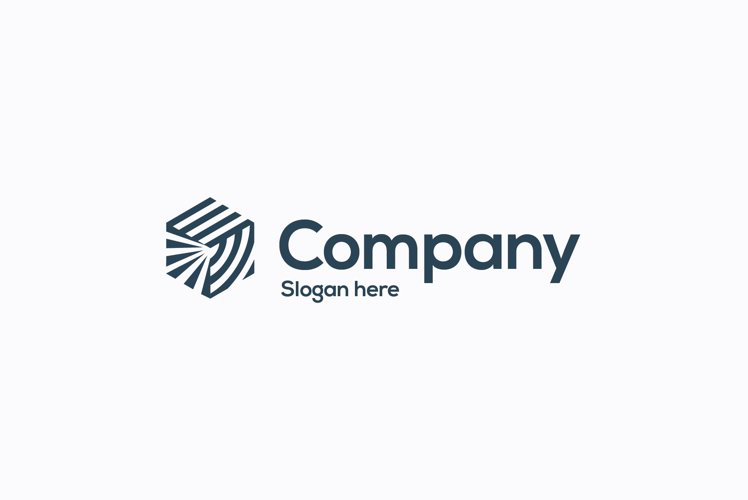

In [3]:
pil_image = Image.open('Company Logo.jpg')
pil_image

In [ ]:
# Define paths and parameters
TEMPLATE_PATH = r"/absolute path of the Template1.docx"
OUTPUT_DIR = r"/absolute path of your output folder directory"
ROW_NUM = demo_data.shape[0]
DEMO_DATA_DICT = demo_data.to_dict("list")

# Print Docx Paragraph Content

In [20]:
doc = DocxWriter(TEMPLATE_PATH)
print(doc.paragraph)

TemplateTemplate
Template
Template





%Recipient Name%
%Address Line 1%
%City% 
%Country%




%Company Name%
%Address Line 1%
%City% 
Telephone: %Phone Number%
Email: %Email%
Date: %Date%

Dear %Recipient Name% [use title (e.g., Mr, Ms etc.) then Surname if letter written by individual OR use Company Name if letter from company/firm]

[Subject of your formal letter (optional) (e.g., name of event, order/ invoice number)]

Introduce yourself and your letter here. Explain why you are writing. Use short sentences with one point per sentence to make your writing clear and concise. 

This paragraph and the following paragraphs make up the main body of your letter and should include as many details as possible. For example, if your letter is about an event or is disputing a contract, you should include relevant dates, order numbers and/ or costs. 

Do not be afraid to refer to and/ or enclose copies of important documents, plans, or photographs if this will illustrate the relevant circumst

# Print Docx Texts Cotent

In [ ]:
for t in doc.texts:
    print(t.text)

Template
Template
%
Recipient Name
%
%
Address Line 1
%
%
City
%
 
%
Country
%
%
Company Name
%
%
Address Line 1
%
%
City
%
 
Telephone: 
%
Phone Number
%
Email: 
%
Email
%
Date: 
%
Date
%
Dear 
%
Recipient Name
%
 
[use title (e.g., Mr, Ms etc.) then Surname if letter written by individual 
OR
 use Company Name if letter from company/firm]
[Subject of your formal letter (optional) (e.g., name of event, order/ invoice number)]
Introduce yourself and your letter here. Explain why you are writing. Use short sentences with one point per sentence to make your writing clear and concise. 
This paragraph and the following paragraphs make up the main body of your letter and should include as many details as possible. For example, if your letter is about an event or is disputing a contract, you should include relevant dates, order numbers and/ or costs. 
Do not be afraid to refer to and/ or enclose copies of important documents, plans, or photographs if this will illustrate the relevant circums

# Print Docx textboxes content

In [24]:
for tb in doc.textbox:
    print(tb.text)

Template
Template


In [25]:
doc.close()

# Find the image that needs to be replaced

Images Name: image1.png


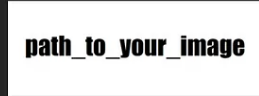

In [6]:
# Define the directory where extracted images will be stored
new_folder_dir = "docx_images"

# Initialize the DocxWriter with the specified template path
doc = DocxWriter(TEMPLATE_PATH)

# Extract images from the DOCX file and save them to the specified folder
doc.extract_image(new_folder_dir)
doc.close()

### Iterate through the images in the new folder to identify the image that needs to be replaced
for img in os.listdir(new_folder_dir):
    print(f"Images Name: {img}")
    display(Image.open(os.path.join(new_folder_dir, img)))

# Replace text and image in Docx

In [7]:
LOGO_IMAGE = "image1.png"

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR, exist_ok=True)

for row in range(ROW_NUM):
    print(f"Processing {row} of {ROW_NUM-1}...")
    
    ### Initialize DocxWriter with the template
    doc = DocxWriter(TEMPLATE_PATH)

    ### Replace text in the document for all columns
    for col_name in demo_data.columns:
        replacement_text = DEMO_DATA_DICT[col_name][row]
        doc.text_replace(doc.texts, col_name, replacement_text, "%")

    ### Replace the image in the document
    doc.image_replace("Company Logo.jpg", LOGO_IMAGE)

    ### Save the new .docx file
    new_docx_name = f"new_template({row}).docx"
    new_docx_path = os.path.join(OUTPUT_DIR, new_docx_name)
    doc.save(new_docx_path)

    ### Save the new file as a .pdf
    new_pdf_name = new_docx_name.replace(".docx", ".pdf")
    new_pdf_path = os.path.join(OUTPUT_DIR, new_pdf_name)
    doc.save_as_pdf(new_docx_path, new_pdf_path)
    print(f"Successfully processed {row}.")

    doc.close()

Processing 0 of 9...
Successfully processed 0.
Processing 1 of 9...
Successfully processed 1.
Processing 2 of 9...
Successfully processed 2.
Processing 3 of 9...
Successfully processed 3.
Processing 4 of 9...
Successfully processed 4.
Processing 5 of 9...
Successfully processed 5.
Processing 6 of 9...
Successfully processed 6.
Processing 7 of 9...
Successfully processed 7.
Processing 8 of 9...
Successfully processed 8.
Processing 9 of 9...
Successfully processed 9.
